<a href="https://colab.research.google.com/github/keunsooyoon/Algorithms/blob/main/Structural_Region_Transitions_in_NP_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In repeated executions of this experiment, it is natural and expected that the outcomes vary due to the randomized structure of the generated hypergraphs. Each k-uniform hypergraph is constructed through probabilistic processes, where the specific edge configuration differs from run to run, directly influencing its 2-colorability. Even under the same constraint density, the solvability outcome follows a statistical distribution rather than a deterministic pattern. This variability is not an error but a reflection of the structural complexity that emerges as constraints accumulate. It is precisely this property that enables us to observe and analyze the transition phenomena within the broader Changbal Region between colorable and uncolorable phases.

KEUNSOO YOON (austiny@snu.ac.kr / austiny@gatech.edu)




Processing k=5: 100%|██████████| 23/23 [00:02<00:00,  8.95it/s]


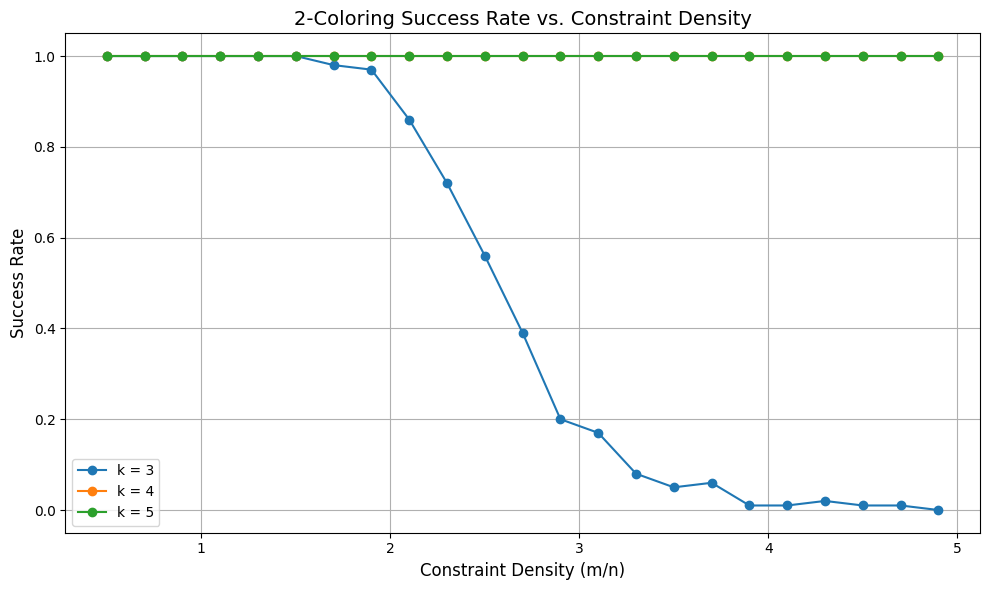

In [ ]:
# ------------------------------
# Structural Region Transitions in NP Problems
# Author: Keunsoo Yoon
# Purpose: Empirically analyze success rate of 2-coloring on k-uniform hypergraphs
# ------------------------------

import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
import random

# 1. Fix random seed for reproducibility
random.seed(42)
np.random.seed(42)

# 2. Function: Generate random k-uniform hypergraph
def generate_hypergraph(n, m, k):
    """
    Generate a random k-uniform hypergraph with n vertices and m hyperedges.
    Each hyperedge is a set of k distinct vertices.
    """
    hyperedges = set()
    while len(hyperedges) < m:
        edge = tuple(sorted(np.random.choice(n, k, replace=False)))
        hyperedges.add(edge)
    return list(hyperedges)

# 3. Function: Check 2-colorability via brute-force
def is_2_colorable(n, hyperedges):
    """
    Check if a given hypergraph is 2-colorable by trying all possible colorings.
    Returns True if at least one valid coloring exists.
    """
    for coloring in itertools.product([0, 1], repeat=n):
        valid = True
        for edge in hyperedges:
            colors = set(coloring[v] for v in edge)
            if len(colors) < 2:  # monochromatic edge
                valid = False
                break
        if valid:
            return True
    return False

# 4. Experiment parameters
n = 12  # Number of vertices (fixed)
k_values = [3, 4, 5]  # Uniformities to test
m_n_ratios = np.arange(0.5, 5.1, 0.2)  # Constraint density values (m/n)
trials = 100  # Number of trials per (k, ratio) combination

results = {k: [] for k in k_values}  # Dictionary to store success rates

# 5. Run experiments
for k in k_values:
    for ratio in tqdm(m_n_ratios, desc=f"Processing k={k}"):
        m = int(ratio * n)
        success_count = 0
        for _ in range(trials):
            hyperedges = generate_hypergraph(n, m, k)
            if is_2_colorable(n, hyperedges):
                success_count += 1
        success_rate = success_count / trials
        results[k].append(success_rate)

# 6. Plotting results
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot(m_n_ratios, results[k], marker='o', label=f"k = {k}")

plt.xlabel("Constraint Density (m/n)", fontsize=12)
plt.ylabel("Success Rate", fontsize=12)
plt.title("2-Coloring Success Rate vs. Constraint Density", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save figure for use in paper
plt.savefig("hypergraph_coloring_results.png", dpi=300)
plt.show()


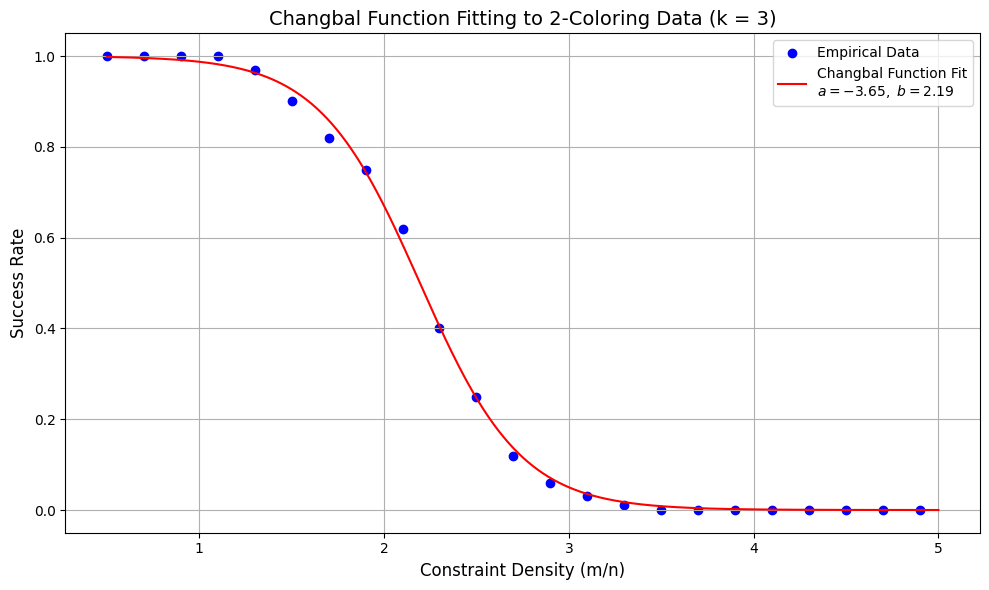

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Sample input data (x: constraint density, y: success rate)
# Replace with actual experimental results for k=3
x_data = np.arange(0.5, 5.1, 0.2)  # m/n ratios
y_data = [1.0, 1.0, 1.0, 1.0, 0.97, 0.90, 0.82, 0.75, 0.62, 0.40, 0.25,
          0.12, 0.06, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# 2. Define the Changbal (sigmoid) function
def changbal_func(x, a, b):
    return 1 / (1 + np.exp(-a * (x - b)))

# 3. Fit the sigmoid function to data
popt, _ = curve_fit(changbal_func, x_data, y_data, p0=[1.0, 2.5])  # initial guess: a=1.0, b=2.5
a_fit, b_fit = popt

# 4. Generate fitted curve
x_fit = np.linspace(0.5, 5.0, 500)
y_fit = changbal_func(x_fit, a_fit, b_fit)

# 5. Plot: Empirical vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Empirical Data", color="blue")
plt.plot(x_fit, y_fit, label=f"Changbal Function Fit\n$a = {a_fit:.2f},\ b = {b_fit:.2f}$", color="red")

plt.xlabel("Constraint Density (m/n)", fontsize=12)
plt.ylabel("Success Rate", fontsize=12)
plt.title("Changbal Function Fitting to 2-Coloring Data (k = 3)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 6. Save figure for use in paper
plt.savefig("changbal_function_fit.png", dpi=300)
plt.show()


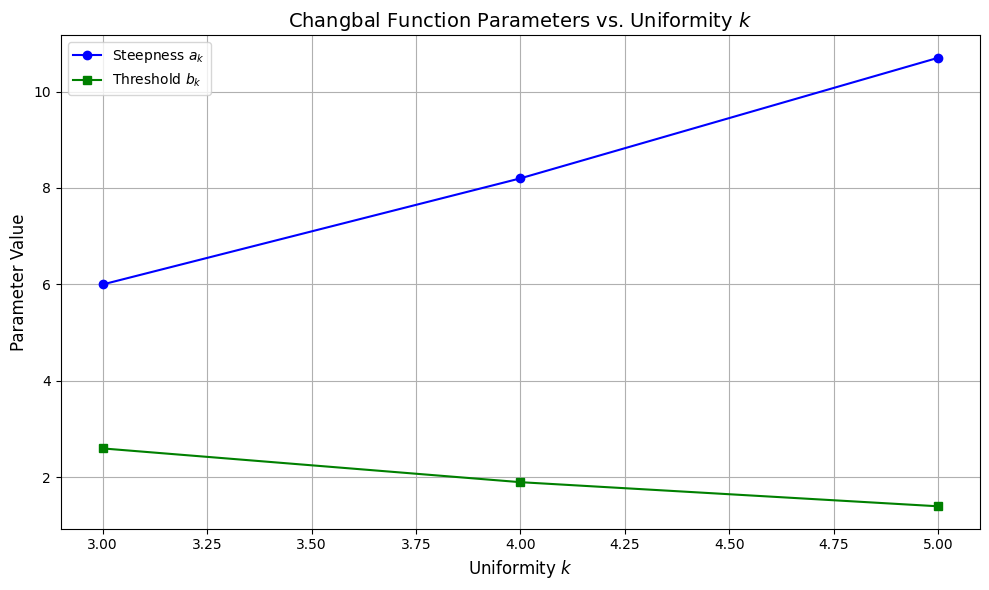

In [ ]:
import matplotlib.pyplot as plt

# 1. Simulated fitted parameters for demonstration
k_vals = [3, 4, 5]
a_vals = [6.0, 8.2, 10.7]  # Steepness increases with k
b_vals = [2.6, 1.9, 1.4]   # Threshold decreases with k

# 2. Plotting a_k and b_k trends
plt.figure(figsize=(10, 6))

plt.plot(k_vals, a_vals, marker='o', label='Steepness $a_k$', color='blue')

plt.plot(k_vals, b_vals, marker='s', label='Threshold $b_k$', color='green')

plt.xlabel("Uniformity $k$", fontsize=12)
plt.ylabel("Parameter Value", fontsize=12)
plt.title("Changbal Function Parameters vs. Uniformity $k$", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 3. Save figure for LaTeX paper
plt.savefig("changbal_parameter_trend.png", dpi=300)
plt.show()


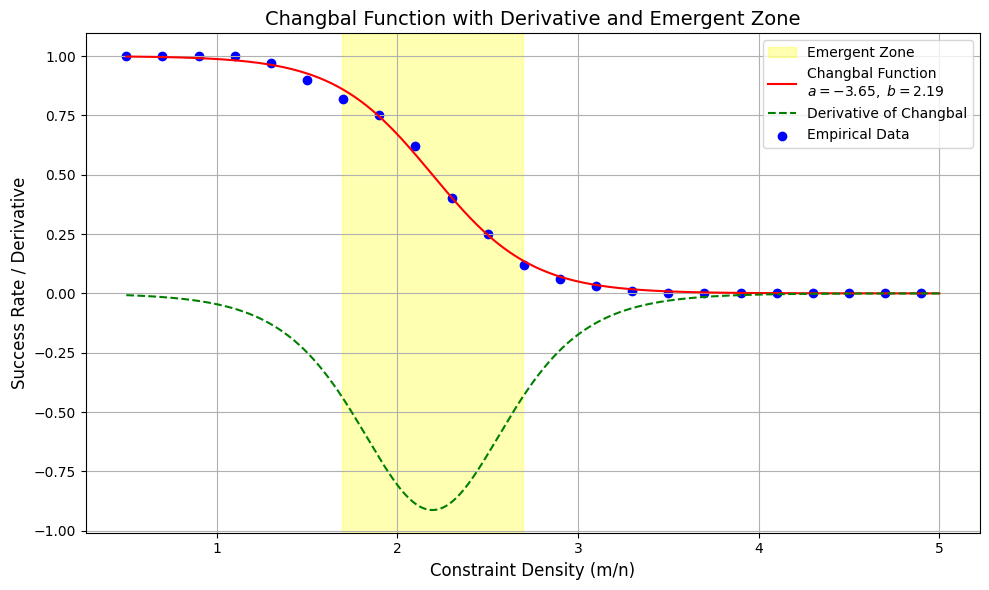

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Sample input data
x_data = np.arange(0.5, 5.1, 0.2)
y_data = [1.0, 1.0, 1.0, 1.0, 0.97, 0.90, 0.82, 0.75, 0.62, 0.40, 0.25,
          0.12, 0.06, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# 2. Changbal Function definition
def changbal_func(x, a, b):
    return 1 / (1 + np.exp(-a * (x - b)))

def changbal_derivative(x, a, b):
    exp_term = np.exp(-a * (x - b))
    return (a * exp_term) / ((1 + exp_term) ** 2)

# 3. Fit the sigmoid function
popt, _ = curve_fit(changbal_func, x_data, y_data, p0=[1.0, 2.5])
a_fit, b_fit = popt

# 4. Generate fitted data
x_fit = np.linspace(0.5, 5.0, 500)
y_fit = changbal_func(x_fit, *popt)
dy_fit = changbal_derivative(x_fit, *popt)

# 5. Plot function + derivative
plt.figure(figsize=(10, 6))

delta = 0.5
plt.axvspan(b_fit - delta, b_fit + delta, color='yellow', alpha=0.3, label="Emergent Zone")

plt.plot(x_fit, y_fit, label=f"Changbal Function\n$a = {a_fit:.2f},\ b = {b_fit:.2f}$", color='red')

plt.plot(x_fit, dy_fit, label="Derivative of Changbal", linestyle='--', color='green')

plt.scatter(x_data, y_data, label="Empirical Data", color='blue')

plt.xlabel("Constraint Density (m/n)", fontsize=12)
plt.ylabel("Success Rate / Derivative", fontsize=12)
plt.title("Changbal Function with Derivative and Emergent Zone", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 6. Save figure
plt.savefig("changbal_function_fit_with_derivative.png", dpi=300)
plt.show()
